### Autoencoders example with Tensorflow 2.0
#### Example from: https://towardsdatascience.com/implementing-an-autoencoder-in-tensorflow-2-0-5e86126e9f7

In [9]:
import tensorflow as tf
import numpy as np

In [2]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, intermediate_dim):
    super(Encoder, self).__init__()
    self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
  def call(self, input_features):
    activation = self.hidden_layer(input_features)
    return self.output_layer(activation)

In [3]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, intermediate_dim, original_dim):
    super(Decoder, self).__init__()
    self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
  def call(self, code):
    activation = self.hidden_layer(code)
    return self.output_layer(activation)

In [4]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)
  
  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [5]:
# Definition of the autoencoder loss function: L = 1/n * sum[i=0;n-1]((x_hat_i - x_i)^2)
def loss(model, original):
  reconstruction_error = tf.reduce_mean(tf.square(tf.subtract(model(original), original)))
  return reconstruction_error

In [6]:
# Definition of the training function
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    gradients = tape.gradient(loss(model, original), model.trainable_variables)
    gradient_variables = zip(gradients, model.trainable_variables)
    opt.apply_gradients(gradient_variables)

In [13]:
# Train the autoencoder and use TensorBoard to visualize loss and images.
autoencoder = Autoencoder(intermediate_dim=64, original_dim=784)
opt = tf.optimizers.Adam(learning_rate=0.01)

(training_features, _), (test_features, _) = tf.keras.datasets.mnist.load_data()
training_features = training_features / np.max(training_features)
training_features = training_features.reshape(training_features.shape[0],
                                              training_features.shape[1] * training_features.shape[2]).astype(np.float32)
training_dataset = tf.data.Dataset.from_tensor_slices(training_features).batch(2000)

writer = tf.summary.create_file_writer('tmp')

with writer.as_default():
  with tf.summary.record_if(True):
    for epoch in range(10):
      for step, batch_features in enumerate(training_dataset):
        train(loss, autoencoder, opt, batch_features)
        loss_values = loss(autoencoder, batch_features)
        original = tf.reshape(batch_features, (batch_features.shape[0], 28, 28, 1))
        reconstructed = tf.reshape(autoencoder(tf.constant(batch_features)), (batch_features.shape[0], 28, 28, 1))
        tf.summary.scalar('loss', loss_values, step=step)
        tf.summary.image('original', original, max_outputs=10, step=step)
        tf.summary.image('reconstructed', reconstructed, max_outputs=10, step=step)

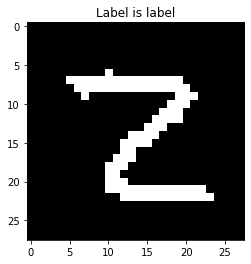

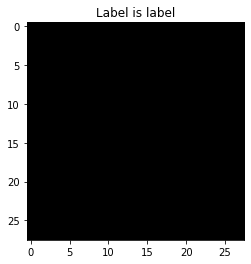

In [22]:
import matplotlib.pyplot as plt

for data in original:
        # The rest of columns are pixels
        pixels = data

        # Make those columns into a array of 8-bits pixels
        # This array will be of 1D with length 784
        # The pixel intensity values are integers from 0 to 255
        pixels = np.array(pixels, dtype='uint8')

        # Reshape the array into 28 x 28 array (2-dimensional array)
        pixels = pixels.reshape((28, 28))

        # Plot
        plt.title('Label is {label}'.format(label="label"))
        plt.imshow(pixels, cmap='gray')
        plt.show()

        break # This stops the loop, I just want to see one

for data in reconstructed:
        # The rest of columns are pixels
        pixels = data

        # Make those columns into a array of 8-bits pixels
        # This array will be of 1D with length 784
        # The pixel intensity values are integers from 0 to 255
        pixels = np.array(pixels, dtype='uint8')

        # Reshape the array into 28 x 28 array (2-dimensional array)
        pixels = pixels.reshape((28, 28))

        # Plot
        plt.title('Label is {label}'.format(label="label"))
        plt.imshow(pixels, cmap='gray')
        plt.show()

        break # This stops the loop, I just want to see one
        

In [24]:
print(reconstructed.shape)
for data in reconstructed[0]:
    print(data.shape)

(2000, 28, 28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)
